# TALLER 2

**Nombre:** Camila Caicedo

**Fecha:** 28/10/2025

## Ejercicio 1

Encuentre todas las raíces del polinomio $x^4 + 540 * x^3 + 109124 * x^2 + 9781632 * x + 328188672 = 0$

Se importan las librerias necesarias para realizar la gráfica de la función y **scipy.optimize.newton** para calcular la raíz con el método de Newton. 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import newton


Se define la función y su derivada.

In [54]:
def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def f_prime(x):
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632


Se usa el método de Newton para encontrar la raíz.

In [55]:
resultado, informacion = newton(f, x0 = 0.75 , fprime = f_prime, full_output = True)
print("Raíz aproximada:", resultado)
print("Información del proceso:", informacion)


Raíz aproximada: -125.999979600101
Información del proceso:       converged: True
           flag: converged
 function_calls: 61
     iterations: 30
           root: -125.999979600101
         method: newton


Esta función registra los pasos que se llevan a cabo para el funcionamiento del método de Newton.

In [56]:
def pasos_newton(f, f_prime, x0, tol=1e-6, max_iter=100):
    pasos = [x0]
    x = x0
    for i in range(max_iter):
        f_x = f(x)
        f_prime_x = f_prime(x)

        if abs(f_x) < tol:
            print(f"Convergencia alcanzada después de {i+1} iteraciones.")
            break

        if f_prime_x == 0:
            print("La derivada es cero en este punto. No se puede continuar.")
            break

        x = x - f_x / f_prime_x
        pasos.append(x)

    else:
        print(f"El método no convergó después de {max_iter} iteraciones.")

    return pasos


Se define esta función para realizar la gráfica de la función.

Convergencia alcanzada después de 27 iteraciones.


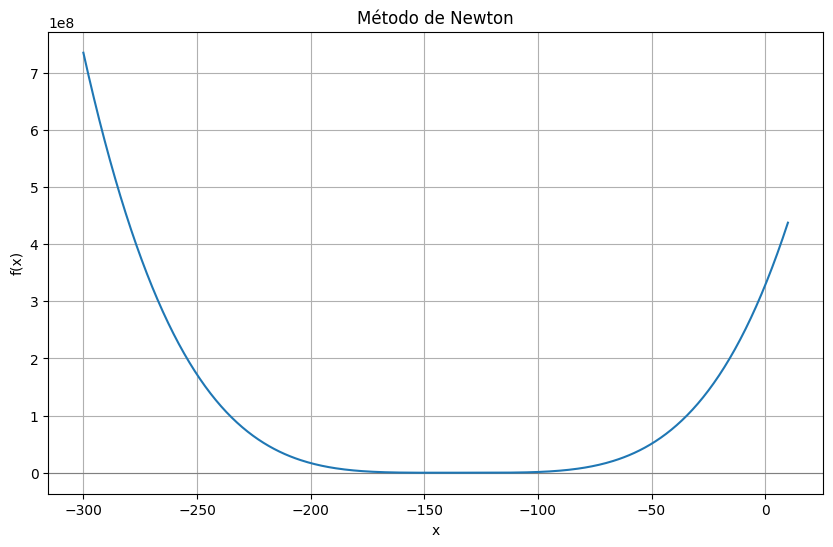

In [58]:
x0 = 0.75
pasos = pasos_newton(f, f_prime, x0)        # Obtener los pasos del método de Newton

# Rango para graficar
x_plot = np.linspace(-300, 10, 400)
y_plot = f(x_plot)

# Configurar figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Método de Newton")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(True)
ax.axhline(0, color='grey', lw=0.8) # Eje x

# Graficar la función
line_func, = ax.plot(x_plot, y_plot, label="f(x)")

Se inician los elementos de la animación.

In [61]:
punto_actual, = ax.plot([], [], 'ro', label="Aproximación actual")      # Punto (xk, f(xk))
linea_tangente, = ax.plot([], [], 'k--', lw=1, label="Línea tangente")  # Línea tangente
prox_corte, = ax.plot([], [], 'go', label="Siguiente aproximación")  # Punto (x{k+1}, 0)
ax.legend()


In [62]:
def init():
    punto_actual.set_data([], [])
    linea_tangente.set_data([], [])
    prox_corte.set_data([], [])
    return punto_actual, linea_tangente, prox_corte

def actualizar(frame):
    xk = pasos[frame]
    yk = f(xk)
    punto_actual.set_data([xk], [yk])

    if frame + 1 < len(pasos):
        xk_siguiente = pasos[frame + 1]
        linea_tangente.set_data([xk, xk_siguiente], [yk, 0])
        prox_corte.set_data([xk_siguiente], [0])
    else:
        linea_tangente.set_data([], [])
        prox_corte.set_data([], [])

    ax.set_title(f"Iteración {frame}: x = {xk:.6f}")
    return punto_actual, linea_tangente, prox_corte


A continuación se crea la animación.

In [63]:
ani = animation.FuncAnimation(fig, actualizar, frames=len(pasos),
                              init_func=init, blit=True, interval=500, repeat=True)

# Guardar GIF
ani.save("metodo_newton.gif", writer='pillow')

plt.show()


Esta función muestra todas las raíces del polinomio.

In [64]:
# Calcular todas las raíces del polinomio
coeficientes = [1, 540, 109124, 9781632, 328188672]
raices = np.roots(coeficientes)

# Mostrar las raíces
print("Raíces del polinomio:")
for i, r in enumerate(raices, start=1):
    if np.iscomplex(r):
        print(f"  Raíz {i}: {r.real:.6f} + {r.imag:.6f}j")
    else:
        print(f"  Raíz {i}: {r:.6f}")


Raíces del polinomio:
  Raíz 1: -152.000000+0.000000j
  Raíz 2: -136.000000+0.000000j
  Raíz 3: -126.000000 + 0.000046j
  Raíz 4: -126.000000 + -0.000046j


## Ejercicio 2

Encuentre todos los puntos en los que la curva $\left(\frac{y}{2}\right)^2 = \left(\frac{x+3}{2}\right) ^2$ -1 interseca el eje y = - 2.


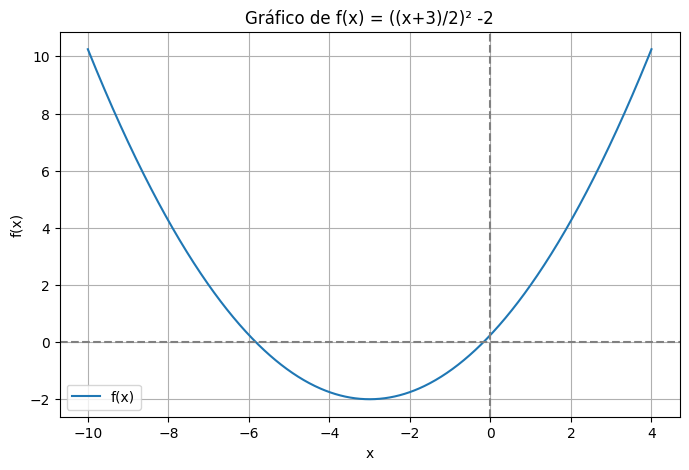

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return ((x+3)/2)**2 - 2

# Crear valores de x
x = np.linspace(-10, 4, 800)
y = f(x)

# Crear el gráfico
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='f(x)')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Gráfico de f(x) = ((x+3)/2)² -2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

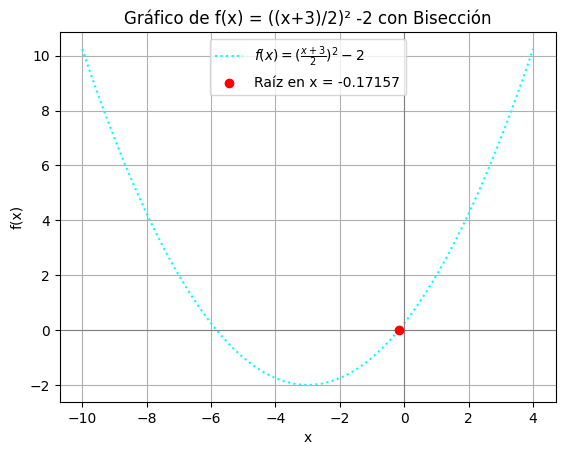

Raíz encontrada: x = -0.17157


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la función f(x)
def f(x):
    return (((x+3)/2)**2 - 2 )

# Algoritmo de bisección
def bisection_method(f, a, b, tol=1e-5, max_iter=1000):
    # Verificar que los signos de f(a) y f(b) sean opuestos
    if f(a) * f(b) >= 0:
        print("No se puede aplicar el método de bisección. Los signos de f(a) y f(b) deben ser opuestos.")
        return None
    
    iter_count = 0
    while (b - a) / 2.0 > tol:
        # Punto medio
        c = (a + b) / 2.0
        # Verificar si el punto medio es una raíz
        if f(c) == 0:
            return c
        # Actualizar el intervalo
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        
        iter_count += 1
        if iter_count > max_iter:
            print("Se alcanzó el número máximo de iteraciones.")
            return None
    
    return (a + b) / 2.0

# Definir el rango de valores para x
x = np.linspace(-10, 4, 800)
y = f(x)

# Graficar la función con la línea de puntos
plt.plot(x, y, label=r'$f(x) = (\frac{x+3}{2})^2-2$', color='cyan', linestyle=':')

# Definir el intervalo [a, b] donde se busca la raíz
a = -4
b = 2

# Llamar al método de bisección
root = bisection_method(f, a, b)

# Mostrar la raíz encontrada en la gráfica
if root is not None:
    plt.scatter(root, f(root), color='red', zorder=5, label=f'Raíz en x = {root:.5f}')

# Agregar título y etiquetas
plt.title('Gráfico de f(x) = ((x+3)/2)² -2 con Bisección')
plt.xlabel('x')
plt.ylabel('f(x)')

# Mostrar la cuadrícula y los ejes
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.8)  # Eje X
plt.axvline(0, color='gray', linewidth=0.8)  # Eje Y

# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

# Mostrar la raíz en consola
if root is not None:
    print(f'Raíz encontrada: x = {root:.5f}')

## Ejercicio 3

Dada la función $f(x) = \frac{\sin(x)}{x}$ ¿A partir de qué valor $x_{T}$ se cumple que $f(x)<0.015,∀x \ge$ $x_{T}$ $

C:\Users\pc\AppData\Local\Temp\ipykernel_19848\2721228920.py:6: RuntimeWarning: invalid value encountered in divide
  return np.where(x != 0, np.sin(x) / x, 1.0)


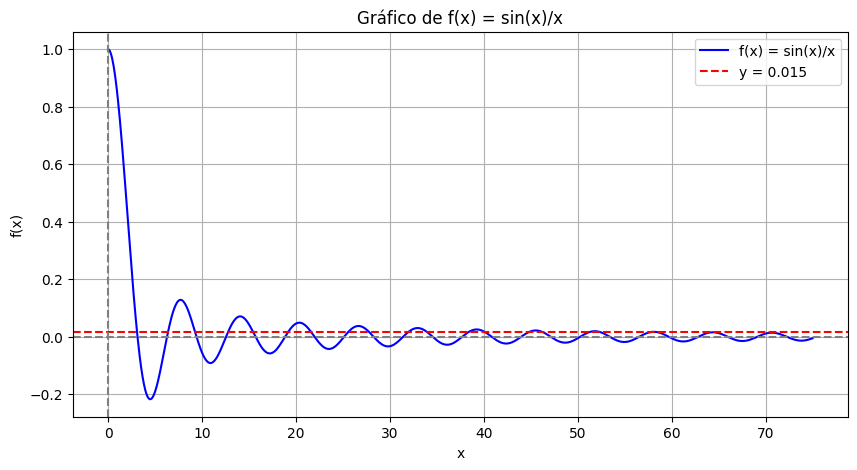

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(x) = sin(x)/x, con f(0) = 1
def f(x):
    return np.where(x != 0, np.sin(x) / x, 1.0)

# Crear un rango de valores de x
x = np.linspace(0, 75, 1000)
y = f(x)

# Crear la gráfica
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x) = sin(x)/x', color='blue')
plt.axhline(0.015, color='red', linestyle='--', label='y = 0.015') 
plt.axhline(0, color='gray', linestyle='--')  # Eje x
plt.axvline(0, color='gray', linestyle='--')  # Eje y
plt.title('Gráfico de f(x) = sin(x)/x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()